In [1]:
from keras.datasets import cifar10
from keras.models import model_from_json
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

import cv2

Using TensorFlow backend.


In [2]:
num_classes = 10

In [3]:
def predict(x, model):
    pred = model.predict(np.array([x]), batch_size=1)
    pred_class = np.argmax(pred)
    pred_per = max(pred[0])
    
    return pred_class, pred_per

In [4]:
# データの読み込み
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 正規化
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

y_train_catego = to_categorical(y_train, num_classes)
y_test_catego = to_categorical(y_test, num_classes)

In [5]:
# モデルを読み込む
model = model_from_json(open('models/50_model.json').read())

# 学習結果を読み込む
model.load_weights('weights/50_weights.h5')

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

print(model.summary())

W0113 17:00:22.954428 140736235160512 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0113 17:00:22.974585 140736235160512 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0113 17:00:23.007143 140736235160512 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0113 17:00:23.010063 140736235160512 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0113 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [6]:
score = model.evaluate(x_test, y_test_catego, verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Test loss : 0.6737617537498474
Test accuracy : 0.8067


In [7]:
pred_classes = model.predict_classes(x_test)

In [8]:
label =['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'boat', 'track']

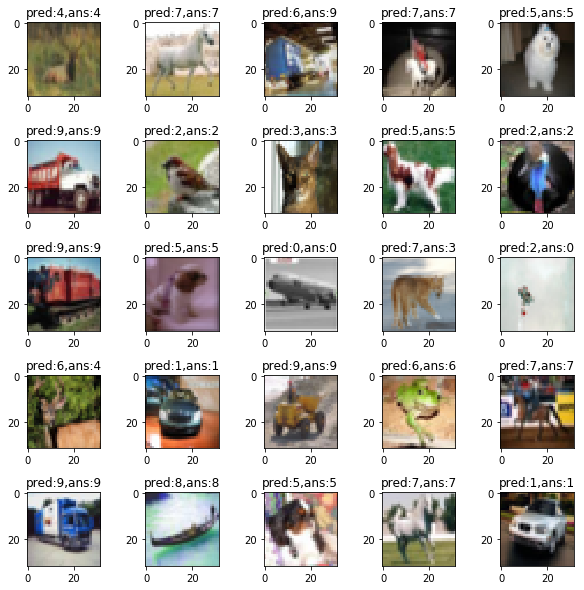

In [9]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(25):
    rand_num=np.random.randint(0,10000)
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_test[rand_num])
    plt.title('pred:{0},ans:{1}'.format(pred_classes[rand_num],int(y_test[rand_num])))


plt.show()

(32, 32, 3)


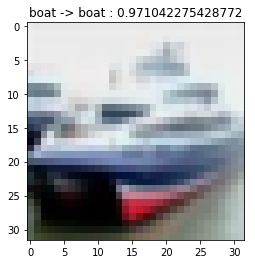

In [10]:
idx = 1
x = x_test[idx]
y = int(y_test[idx])

print(x.shape)

pred_class, pred_per = predict(x, model)

plt.imshow(x)
plt.title(f'{label[y]} -> {label[pred_class]} : {pred_per}')
plt.show()

(32, 32)


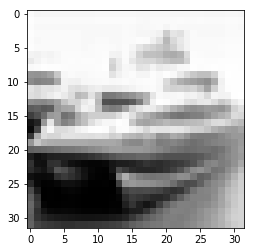

In [13]:
q = x.copy()
gray_x = cv2.cvtColor(q,cv2.COLOR_BGR2GRAY)
print(gray_x.shape)

plt.imshow(gray_x, 'gray')
plt.show()

In [16]:
gray_3 = cv2.cvtColor(gray_x, cv2.COLOR_GRAY2BGR)
print(gray_3.shape)


(32, 32, 3)


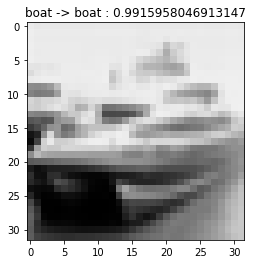

In [17]:
pred_class, pred_per = predict(gray_3, model)

plt.imshow(gray_3)
plt.title(f'{label[y]} -> {label[pred_class]} : {pred_per}')
plt.show()

In [18]:
def bgr_to_gray(x_list):
    gray_list = []

    for x in x_list:
        gray_x = cv2.cvtColor(x,cv2.COLOR_BGR2GRAY)
        gray_x = cv2.cvtColor(gray_x, cv2.COLOR_GRAY2BGR)
        gray_list.append(gray_x)
        
    return np.array(gray_list)

In [20]:
gray_test = bgr_to_gray(x_test)
gray_test.shape

(10000, 32, 32, 3)

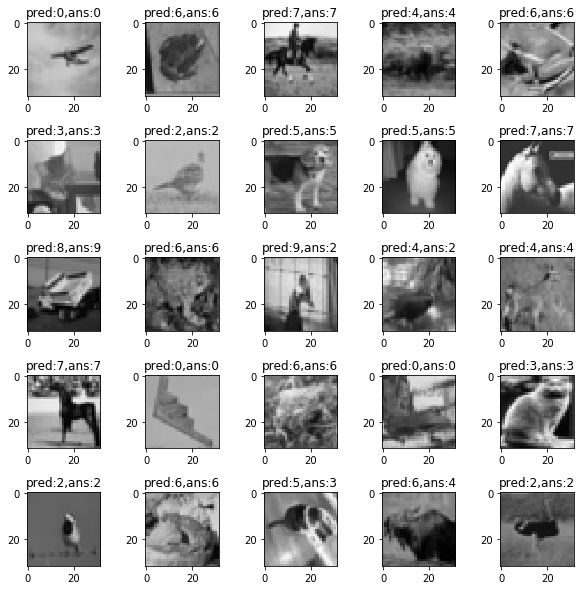

In [21]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(25):
    rand_num=np.random.randint(0,10000)
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(gray_test[rand_num])
    plt.title('pred:{0},ans:{1}'.format(pred_classes[rand_num],int(y_test[rand_num])))


plt.show()

In [22]:
score = model.evaluate(gray_test, y_test_catego, verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Test loss : 0.8209093229293823
Test accuracy : 0.7634
